In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x7dae548e9e80>)

In [4]:
#Open the dataset
df_stars = pd.read_csv("stars.csv")

In [5]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [6]:
#Check for missing values
df_stars.isnull().sum() #Tell us how many missing values we have in each column

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


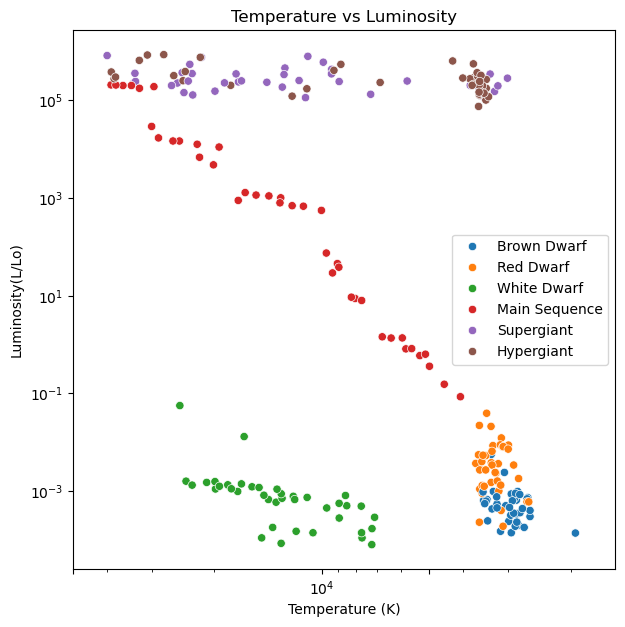

In [8]:
#Temperature vs luminosity
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.title(r'Temperature vs Luminosity')
plt.show()

Firstly perform an unstandardised PCA

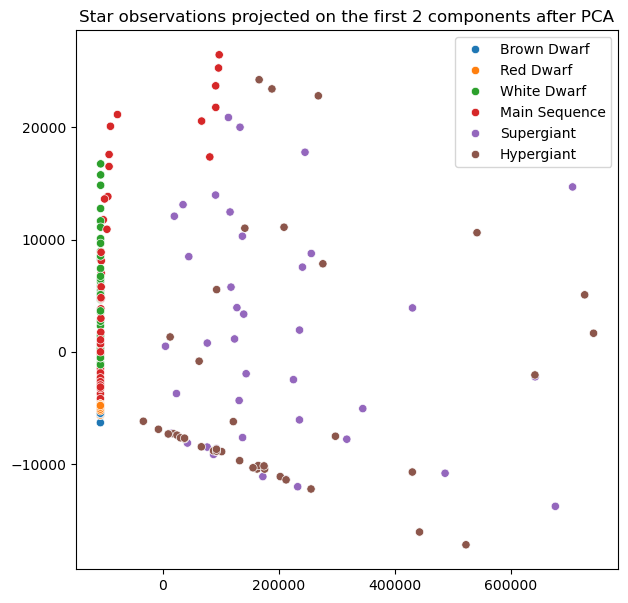

In [9]:
pca = PCA(n_components=2)

#Select feature columns for PCA
df_stars_data = df_stars.drop(columns=["Star color", "Star type", "Spectral Class"])
X = np.array(df_stars_data)
projected_stars = pca.fit_transform(X)

#Plot
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=projected_stars[:,0], y=projected_stars[:,1], hue=labels)
plt.title("Star observations projected on the first 2 components after PCA")
plt.show()


Apply the standardisation 

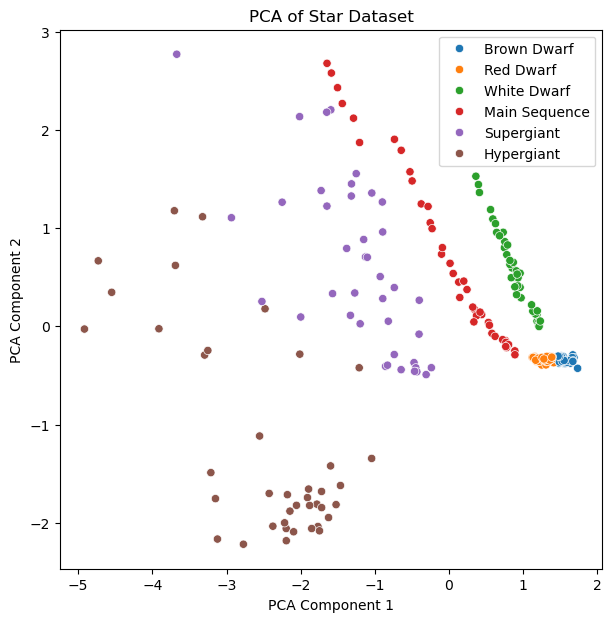

In [10]:
#Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_stars_data)

#Perform PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Plot the PCA result
plt.figure(figsize=(7,7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Star Dataset')
plt.show()

In [11]:
#Variance explained by the two components
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance by the two components:", np.sum(explained_variance))

Explained variance by each component: [0.60357391 0.23500784]
Total explained variance by the two components: 0.8385817508043479


In [13]:
#Number of components to explain 99.5% of variance
pca995 = PCA(n_components=0.995)
pca995.fit(X_scaled)
print("{:d} features are needed to explain 99.5% of the variance".format(pca995.n_components_))

4 features are needed to explain 99.5% of the variance
